In [1]:
import matplotlib.pyplot as plt
import cv2
import pickle
import numpy as np
import requests

In [2]:
with open("data_split/test_paths.pkl", "rb") as f:
    test_paths = pickle.load(f)

In [3]:
# Capture frame from camera
target_path = test_paths[np.random.randint(0, len(test_paths))]
img = cv2.imread(target_path)
_, img_encoded = cv2.imencode(".jpg", img)
img_bytes = img_encoded.tobytes()

# Prepare the upload
files = {"file": ("frame.jpg", img_bytes, "image/jpeg")}

# Send to FastAPI endpoint
response = requests.post("http://localhost:8000/recomend_custom/", files=files)

paths= response.json()['paths']
paths = [target_path] + paths
scores = response.json()['scores']
scores = [1] + scores

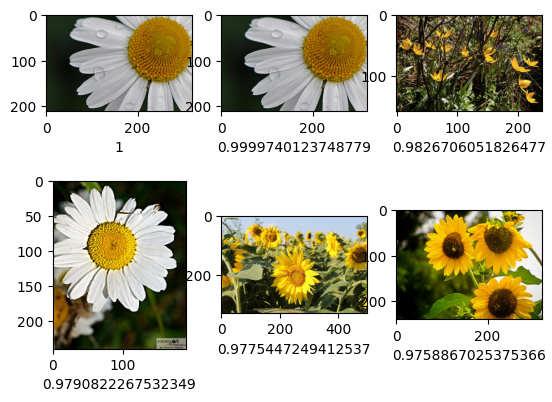

In [4]:
fig, ax = plt.subplots(2, 3)
for i in range(2):
    for j in range(3):
        ax[i][j].imshow(
            cv2.imread(paths[i * 3 + j])[...,::-1]
        )
        ax[i][j].set_xlabel(scores[i*3 + j])

plt.show()

In [5]:
ax[0][0]

<Axes: xlabel='1'>